# 데이터프레임 리뷰 및 활용
#1. 데이터프레임과 시리즈 만들기

**데이터 프레임**
 - os -> 폴더, 파일
 - 웹수집 -> api, 웹페이지
 - 이미지 -> CNN, RNN
 - 시계열 -> LSTM,ARIMA

Data, AI ... 등 으론 결국 문제해결을 하기위한 것들임.  

문제해결  
 1. 문제 정의 - 원론적으로 문제가 있어야 해결이 가능함
 2. Data - 문제를 해결하기위한 가용 가능한 데이터(업무용)
   - Y값은 있어도 그걸 위한 X가 없으면?
 3. 과학적 - Discussion이 필요

In [ ]:
import numpy as np
import pandas as pd

#시리즈로 만들기
my_series = pd.Series({"United Kingdom":"London", "India":"New Delhi", "United States":"Washington", "Belgium":"Brussels"})
print(pd.DataFrame(my_series))
df = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6]]))

# 몇행몇열
print(df.shape)

# 몇행 확인
print(len(df.index))
df[0].count()	#NaN은 제외하고 카운트
list(df.columns.values)

                         0
United Kingdom      London
India            New Delhi
United States   Washington
Belgium           Brussels
(2, 3)
2


[0, 1, 2]

#2. Index, Column 선택하기

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6],[7,8,9]]), columns=['A','B','C'])
df.A    #특정 컬럼 선택, Series
df['A']

#.loc[]: 인덱스 라벨에 사용,loc[2]이면, 2라는 라벨을 갖는 인덱스를 의미
#.iloc[]: 인덱스에 사용, iloc[2]는 2의 위치(3번째)의미

df.iloc[ 0 , 1 ]  #numpy array 처럼 사용하기
df.iloc[ :, 1 ]

df.loc[: , 'A']
df.loc[ 1, 'B'] #여기서1은 index가 1을 의미
df.iloc[ 1, 1 ] #여기서의 1은 두번째값이라는 의미

#print(df.iloc[0][0])	# iloc[]
#print(df.loc[0]['A'])	# loc[]
#print(df.iloc[0])	# iloc[]로 행선택

print(df.loc[:,'A'])	# loc[]로 열선택
print(df.loc[0,'A'])
print(df.iloc[0,0])

#df에서 2행, 1-2열 선택하시오.
df.iloc[ 1  , 0:2  ]

#df에서 2-3행, 1-3열 선택하시오.
df.iloc[ 1:3,  :  ]

0    1
1    4
2    7
Name: A, dtype: int64
1
1


,A,B,C
1,4,5,6
2,7,8,9


#3. Index, Row, Column 추가

In [ ]:
df = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6]]), columns=['A','B','C'])
df.set_index('C')	# C열이 index로 지정됨

#열 추가
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), columns=['A', 'B', 'C'])
df['D'] = df.index

#열 추가2
df = pd.DataFrame(data=np.array([[1, 1, 2], [3, 2, 4]]))
df.loc[:, 4] = pd.Series(['5', '6'], index=df.index)	# Append a column to `df`
print(df)

# reset_index()로 인덱스 값 재설정
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), index= [2.5, 12.6, 4.8], columns=[48, 49, 50])
df_reset = df.reset_index(level=0, drop=True)	#drop 인덱스 제거, inplace 기존 인덱스가 새로운 컬럼으로 추가됨
print(df_reset)


   0  1  2  4
0  1  1  2  5
1  3  2  4  6
   48  49  50
0   1   2   3
1   4   5   6
2   7   8   9


#4. index, row, column 삭제

In [ ]:
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [40, 50, 60], [23, 35, 37]]),index= [2.5, 12.6, 4.8, 4.8, 2.5],  columns=[48, 49, 50])
df.reset_index().drop_duplicates(subset='index', keep='last').set_index('index')

# A 열 삭제
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), columns=['A', 'B', 'C'])
df.drop('A', axis=1, inplace=True)
df.drop(df.columns[[1]], axis=1)	#axis 0: row, 1: column

#행 삭제
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [40, 50, 60], [23, 35, 37]]),index= [2.5, 12.6, 4.8, 4.8, 2.5],  columns=[48, 49, 50])
print(df.drop(df.index[1]))	# 인덱스 1 위치 행 삭제



     48  49  50
2.5   1   2   3
4.8   7   8   9
4.8  40  50  60
2.5  23  35  37


#5. 데이터프레임 값 변경

In [ ]:
# 문자열을 0~4로 교체
df = pd.DataFrame(data=np.array([['OK', 'Perfect', 'Acceptable'], ['Awful','Awful', 'Perfect'], ['Acceptable', 'OK', 'Poor']]), columns=['Student1', 'Student2', 'Student3'])
df.replace(['Awful', 'Poor', 'OK', 'Acceptable', 'Perfect'], [0, 1, 2, 3, 4])

#정규표현식으로 문자열 제거
df = pd.DataFrame(data=np.array([['1\n', 2, '3\n'], [4, 5, '6\n'], [7, '8\n', 9]]))
df.replace({'\n': '<br>'}, regex=True)

#값 변경
df = pd.DataFrame(data=np.array([[1, 2, '+3b'], [4, 5, '-6b'], [7, 8, '+9A']]), columns=['class', 'test', 'result'])
df['result'] = df['result'].map(lambda x: x.lstrip('+-').rstrip('aAbBcC'))


#열의 텍스트를 여러 줄로 나누기
df = pd.DataFrame(data=np.array([[34, 0, '23:44:55'], [22, 0, '66:77:88'], [19, 1, '43:68:05 56:34:12']]), columns=['Age', 'PlusOne', 'Ticket'])

# 3행에 값이 2개인 ticket 열을 여러 줄로 나누고 시리즈로 만들고 값을 추가
ticket_series = df['Ticket'].str.split(' ').apply(pd.Series, 1).stack()
ticket_series.index = ticket_series.index.droplevel(-1)	#인덱스가 여러개여서, 2번째 인덱스 삭제
ticketdf = pd.DataFrame(ticket_series)
del df['Ticket']
df.join(ticketdf)

,0
0,23:44:55
1,66:77:88
2,43:68:05
2,56:34:12


In [ ]:
import pandas as pd

#1. weatherAUS, 범주형컬럼 찾기
aus = pd.read_csv("weatherAUS.csv")
aus.dtypes #object = 범주형
[i for i in aus.columns if aus[i].dtype == 'object']

#2. RainTomorrow Yes = 1 No = 0
aus.replace({'RainTomorrow': {'Yes': 1, 'No': 0}})
aus.RainTomorrow.replace(['Yes', 'No'], [1, 0])

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
36876    1.0
36877    0.0
36878    0.0
36879    0.0
36880    0.0
Name: RainTomorrow, Length: 36881, dtype: float64

#6.데이터프레임에 함수 적용

In [ ]:

#행/열에 함수 적용
def doubler(x):
    if x % 2 == 0:
        return x
    else:
        return x * 2

df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), columns=['A', 'B', 'C'])
df['A'].apply(doubler)	# doubler라는 함수를 A열에 적용
doubled_df = df.applymap(doubler)	# `applymap()`는 데이터프레임 전체에 행/열 단위 적용시
print(doubled_df)


    A   B   C
0   2   2   6
1   4  10   6
2  14   8  18


#7. 데이터프레임 탐색, Missing Value 확인 및 비어있는 DF 만들기


    A
0 NaN
1 NaN
2 NaN
3 NaN


<Axes: >

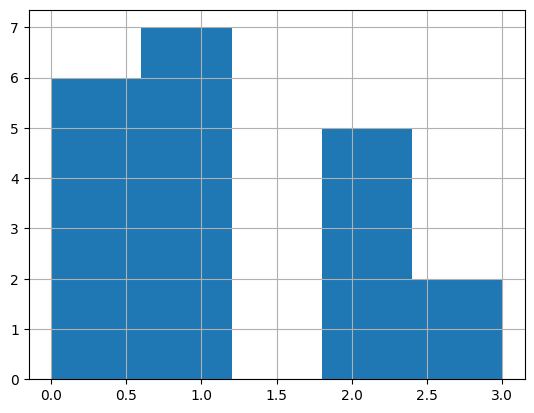

In [ ]:
import numpy as np
df = pd.DataFrame(np.nan, index=[0,1,2,3], columns=['A'])
print(df)

df.isnull()
df.isnull().mean()

#eda
import pandas as pd
import matplotlib.pyplot as plt

data = pd.DataFrame( [1,0,0,1,2,1,1,1,0,0,0,2,2,1,3,3,2,2,1,0], columns=['v1'])
data.dtypes #컬럼별 값의 타잎

data['v1'].unique()

#Histogram
data['v1'].hist(bins=5)

#8. 데이터프레임 형태 변경

In [ ]:
#피벗
#values: 피벗테이블 정리를 원하는 값
#columns: 피벗의 열
#index: 피벗의 행

products = pd.DataFrame({'category': ['Cleaning', 'Cleaning', 'Entertainment', 'Entertainment', 'Tech', 'Tech'],'store': ['Walmart', 'Dia', 'Walmart', 'Fnac', 'Dia','Walmart'],'price':[11.42, 23.50, 19.99, 15.95, 55.75, 111.55],'testscore': [4, 3, 5, 7, 5, 8]})

pivot_products = products.pivot(index='category', columns='store', values='price')
print(pivot_products)

pivot_products2 = products.pivot_table(index='category', columns='store', values='price', aggfunc='mean')
print(pivot_products2)

#Melting
people = pd.DataFrame({'FirstName' : ['John', 'Jane'],'LastName' : ['Doe', 'Austen'],'BloodType' : ['A-', 'B+'],'Weight' : [90, 64]})
print(pd.melt(people, id_vars=['FirstName', 'LastName'], var_name='measurements'))


store            Dia   Fnac  Walmart
category                            
Cleaning       23.50    NaN    11.42
Entertainment    NaN  15.95    19.99
Tech           55.75    NaN   111.55
store            Dia   Fnac  Walmart
category                            
Cleaning       23.50    NaN    11.42
Entertainment    NaN  15.95    19.99
Tech           55.75    NaN   111.55
  FirstName LastName measurements value
0      John      Doe    BloodType    A-
1      Jane   Austen    BloodType    B+
2      John      Doe       Weight    90
3      Jane   Austen       Weight    64


#9. 데이터프레임 연산

In [ ]:
df2 = pd.DataFrame( np.array( [[1,2], [3,4], [5,6]] ))

df1 = pd.DataFrame( [[1,2], [3,4], [5,6]],
                   index=['a', 'b', 'c'],
                   columns= ['c1','c2']  )

df1.index = ['2022-04-28','2022-04-29', '2022-04-30']
df2.index = ['2022-04-26','2022-04-27', '2022-04-28']

df1.columns = ['c1', 'c2']
df2.columns = ['c2', 'c3']

print(df1+df2)


            c1   c2  c3
2022-04-26 NaN  NaN NaN
2022-04-27 NaN  NaN NaN
2022-04-28 NaN  7.0 NaN
2022-04-29 NaN  NaN NaN
2022-04-30 NaN  NaN NaN


#10. 파일쓰기 및 읽기

In [ ]:
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), columns=['A', 'B', 'C'])

df.to_csv('test.csv', sep='\t', encoding='utf-8')

writer = pd.ExcelWriter('test.xlsx')
df.to_excel(writer, 'DataFrame')
writer.save()

#한글 파일 중 CP949인코딩
df2 = pd.read_csv("train_df.csv", encoding="CP949")

<ipython-input-10-a58dd64c9f19>:7: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


FileNotFoundError: ignored

#11. ExcelWriter

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
tips = sns.load_dataset("tips")

In [ ]:
with pd.ExcelWriter("example.xlsx") as writer:
    diamonds.to_excel(writer, sheet_name="diamonds")
    tips.to_excel(writer, sheet_name="tips")

#12. groupby + nth row

In [ ]:
diamonds.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [ ]:
diamonds.groupby("cut").nth(5)

,carat,color,clarity,depth,table,price,x,y,z
cut,,,,,,,,,
Ideal,0.33,I,SI2,61.2,56.0,403,4.49,4.50,2.75
Premium,0.24,I,VS1,62.5,57.0,355,3.97,3.94,2.47
Very Good,0.23,E,VS2,63.8,55.0,352,3.85,3.92,2.48
Good,0.30,I,SI2,63.3,56.0,351,4.26,4.30,2.71
Fair,0.91,H,SI2,64.4,57.0,2763,6.11,6.09,3.93


In [ ]:
#tips 자료에서 요일별로 그룹바이, 3번째값을 출력해보세요
tips.groupby("day").nth(2)

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Thur,17.29,2.71,Male,No,Lunch,2
Fri,5.75,1.00,Female,Yes,Dinner,2
Sat,20.29,2.75,Female,No,Dinner,2
Sun,21.01,3.50,Male,No,Dinner,3


#13. factorize
- LabelEncoder 대신 사용

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(....)

SyntaxError: ignored

In [ ]:
pd.get_dummies( diamonds.cut)#OHE
pd.factorize(diamonds["cut"])#LE

(array([0, 1, 2, ..., 3, 1, 0]),
 CategoricalIndex(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], categories=['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], ordered=False, dtype='category'))

In [ ]:
diamonds.sample(frac=0.1)  #sampling
#frac: 비율 지정, replace: 복원 비복원 지정

,carat,cut,color,clarity,depth,table,price,x,y,z
37859,0.44,Premium,E,VS2,60.4,59.0,1003,4.90,4.93,2.97
3444,0.90,Very Good,H,SI1,63.4,58.0,3387,6.16,6.11,3.89
6975,1.02,Premium,F,SI2,62.7,59.0,4151,6.38,6.45,4.02
20011,0.32,Good,G,SI2,63.4,55.0,421,4.32,4.35,2.75
11028,1.07,Ideal,H,SI1,62.0,57.0,4918,6.56,6.51,4.05
...,...,...,...,...,...,...,...,...,...,...
1021,0.75,Premium,D,SI1,62.8,60.0,2903,5.78,5.74,3.62
1158,0.80,Very Good,D,SI1,58.2,63.0,2925,6.07,6.03,3.52
3089,0.71,Ideal,D,SI1,62.3,56.0,3316,5.72,5.70,3.56
36595,0.30,Ideal,F,IF,62.0,56.0,947,4.30,4.34,2.68


In [ ]:
diamonds["cut_enc"] = pd.factorize(diamonds["cut"])[0]
diamonds["cut_enc"].sample(5)
#diamonds.sample(frac=1)

33716    0
37248    3
20481    2
52451    0
48831    0
Name: cut_enc, dtype: int64

In [ ]:
odes, unique = pd.factorize(diamonds["cut"], sort=True)
odes #결과 array
unique#범주정보

CategoricalIndex(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], categories=['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], ordered=False, dtype='category')

In [ ]:
#Tips 자료에서 time 변수를 factorize 시켜서, time_enc라는 변수로
#tips에 추가해주세요
#tips에서 랜덤하게 1%자료를 샘플링해보세요
a, b = pd.factorize( tips.time)
tips["time_enc"] = a
tips.sample( frac = 0.01 )

,total_bill,tip,sex,smoker,day,time,size,time_enc
70,12.02,1.97,Male,No,Sat,Dinner,2,0
143,27.05,5.00,Female,No,Thur,Lunch,6,1


#14. explode

In [ ]:
data = pd.Series([1, 6, 7, [46, 56, 49], 45,
                  [15, 10, 12]]).to_frame("dirty")
data.values
data.explode("dirty", ignore_index=True)

,dirty
0,1
1,6
2,7
3,46
4,56
5,49
6,45
7,15
8,10
9,12


In [ ]:
data.explode("dirty", ignore_index=False)

,dirty
0,1
1,6
2,7
3,46
3,56
3,49
4,45
5,15
5,10
5,12


#15. between

In [ ]:
idx = diamonds["price"].between(3500, 3700)#3500이상, 3700이하
diamonds[ idx ]

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_enc
3935,0.90,Very Good,H,SI1,63.3,58.0,3500,6.04,6.13,3.85,3
3936,0.93,Good,H,VS1,59.1,64.0,3500,6.36,6.27,3.73,2
3937,0.90,Ideal,G,SI2,62.4,56.0,3500,6.14,6.19,3.85,0
3938,0.83,Ideal,F,SI1,61.7,57.0,3500,6.04,6.08,3.74,0
3939,0.90,Fair,H,VS1,65.9,60.0,3500,5.99,5.96,3.94,4
...,...,...,...,...,...,...,...,...,...,...,...
4804,0.90,Very Good,F,SI1,63.8,54.0,3699,6.09,6.13,3.90,3
4805,0.90,Very Good,F,SI1,63.4,57.0,3699,6.06,6.11,3.86,3
4806,0.90,Good,F,SI1,58.0,58.0,3699,6.24,6.28,3.63,2
4807,1.00,Fair,G,SI1,66.1,62.0,3700,6.10,6.03,4.01,4


In [ ]:
diamonds[diamonds["price"].between(3500, 3700, inclusive="neither")].sample(5)
#3500 초과, 3700 미만

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_enc
4234,0.90,Good,G,SI1,63.9,60.0,3574,6.07,6.10,3.89,2
4801,0.82,Premium,E,VS2,59.7,61.0,3697,6.08,6.04,3.62,1
4792,1.10,Premium,I,SI2,62.4,59.0,3696,6.55,6.51,4.08,1
4027,1.11,Premium,J,SI1,59.5,58.0,3524,6.89,6.77,4.07,1
4192,1.00,Premium,F,SI2,59.2,61.0,3562,6.59,6.51,3.87,1


In [ ]:
#tips자료에서 total_bill이 중앙값 이상 최대값 이하에 해당하는
#행들을 선택해서, 10%만 출력해보세요.
tips.total_bill.median() #중앙값
tips.total_bill.max()

50.81

#16. styler

In [ ]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.describe().T.drop("count", axis=1)

,mean,std,min,25%,50%,75%,max
Pregnancies,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
diabetes.describe().T.drop("count", axis=1).style.highlight_max(color="darkred")

,mean,std,min,25%,50%,75%,max
Pregnancies,3.845052,3.369578,0.000000,1.000000,3.000000,6.000000,17.000000
Glucose,120.894531,31.972618,0.000000,99.000000,117.000000,140.250000,199.000000
BloodPressure,69.105469,19.355807,0.000000,62.000000,72.000000,80.000000,122.000000
SkinThickness,20.536458,15.952218,0.000000,0.000000,23.000000,32.000000,99.000000
Insulin,79.799479,115.244002,0.000000,0.000000,30.500000,127.250000,846.000000
BMI,31.992578,7.884160,0.000000,27.300000,32.000000,36.600000,67.100000
DiabetesPedigreeFunction,0.471876,0.331329,0.078000,0.243750,0.372500,0.626250,2.420000
Age,33.240885,11.760232,21.000000,24.000000,29.000000,41.000000,81.000000
Outcome,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
diabetes.describe().T.drop("count",
                           axis=1).style.background_gradient(
    subset=["mean", "50%"], cmap="Reds"
)

,mean,std,min,25%,50%,75%,max
Pregnancies,3.845052,3.369578,0.000000,1.000000,3.000000,6.000000,17.000000
Glucose,120.894531,31.972618,0.000000,99.000000,117.000000,140.250000,199.000000
BloodPressure,69.105469,19.355807,0.000000,62.000000,72.000000,80.000000,122.000000
SkinThickness,20.536458,15.952218,0.000000,0.000000,23.000000,32.000000,99.000000
Insulin,79.799479,115.244002,0.000000,0.000000,30.500000,127.250000,846.000000
BMI,31.992578,7.884160,0.000000,27.300000,32.000000,36.600000,67.100000
DiabetesPedigreeFunction,0.471876,0.331329,0.078000,0.243750,0.372500,0.626250,2.420000
Age,33.240885,11.760232,21.000000,24.000000,29.000000,41.000000,81.000000
Outcome,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
tips.columns
#tips에서 total_bill하고, tip 컬럼을 선택하세요
#각 변수의 최소값에 하이라이트 해보세요
tips[ ["total_bill", "tip"]].style.highlight_min(color="darkred")

,total_bill,tip
0,16.990000,1.010000
1,10.340000,1.660000
2,21.010000,3.500000
3,23.680000,3.310000
4,24.590000,3.610000
5,25.290000,4.710000
6,8.770000,2.000000
7,26.880000,3.120000
8,15.040000,1.960000
9,14.780000,3.230000


#17. convert_dtypes


In [ ]:
diamonds.dtypes
diamonds.convert_dtypes().dtypes  #데이터프레임의 dtype 을
#보다 적절한 dtype으로 변환

carat       Float64
cut        category
color      category
clarity    category
depth       Float64
table       Float64
price         Int64
x           Float64
y           Float64
z           Float64
cut_enc       Int64
dtype: object

#18. select_dtypes

In [ ]:
diamonds.select_dtypes(include=np.number).head()

,carat,depth,table,price,x,y,z,cut_enc
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,1
2,0.23,56.9,65.0,327,4.05,4.07,2.31,2
3,0.29,62.4,58.0,334,4.20,4.23,2.63,1
4,0.31,63.3,58.0,335,4.34,4.35,2.75,2


In [ ]:
diamonds.select_dtypes(exclude=np.number).head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [ ]:
#diamonds에서 'category' dtype 컬럼만 제외해서 5개만 샘플링
diamonds.select_dtypes(exclude='category').sample(5)

,carat,depth,table,price,x,y,z,cut_enc
32176,0.39,61.7,57.0,787,4.65,4.68,2.88,3
7683,1.03,63.0,59.0,4274,6.43,6.40,4.04,1
17014,1.25,61.2,56.0,6793,6.93,6.95,4.25,0
50475,0.71,63.4,57.0,2266,5.70,5.63,3.59,3
531,0.70,63.3,56.0,2826,5.60,5.58,3.54,3


#19. mask

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
tips = sns.load_dataset("tips")

In [ ]:
ages = pd.Series([55, 52, 50, 66, 57, 59, 49, 60]).to_frame("ages")
ages

,ages
0,55
1,52
2,50
3,66
4,57
5,59
6,49
7,60


In [ ]:
~ages["ages"].between(50, 60) #50보다 작거나, 60보다 크면 true

0    False
1    False
2    False
3     True
4    False
5    False
6     True
7    False
Name: ages, dtype: bool

In [ ]:
ages.mask(cond=~ages["ages"].between(50, 60), other=np.nan)

,ages
0,55.0
1,52.0
2,50.0
3,NaN
4,57.0
5,59.0
6,NaN
7,60.0


#20. nlargest, nsmallest

In [ ]:
diamonds.nlargest(5, "price")

,carat,cut,color,clarity,depth,table,price,x,y,z
27749,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01


In [ ]:
diamonds.nsmallest(5, "price")

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#21. idxmax, idxmin


In [ ]:
diamonds.price.idxmax() #price 컬럼의 최대값이 있는 행번호..
diamonds.carat.idxmin() # carat 컬럼의 최소값이 있는...

14

#22. clip

In [ ]:
ages.clip(50, 60)

,ages
0,55
1,52
2,50
3,60
4,57
5,59
6,50
7,60


#23. hasnans

In [ ]:
series = pd.Series([2, 4, 6, "sadf", np.nan])

series.hasnans

True

#24. at, iat

In [ ]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
diamonds.at[234, "cut"]
diamonds.iat[1564, 4]

61.2

In [ ]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [ ]:
#tips에서 tip 컬럼의 최대값이 행을 찾아보세요
tips.tip.idxmax()
tips.loc[ 170, :]
#tips에서 total_bill 값이 제일 작은 5개 행을 출력하세요
tips.nsmallest(5, "total_bill")
#tips에서 day컬럼의 3번째행 값을 출력하세요
tips.at[2, "day"]

'Sun'

#25. argsort

In [ ]:
tips.reset_index(inplace=True, drop=True)

sort_idx = tips["total_bill"].argsort(kind="mergesort")
#total_bill 컬럼에서 각 값의 크기 순서를 숫자로 출력
print(sort_idx)
# `tips`를 total_bill 값으로 정렬
tips.iloc[sort_idx].head()
#각 행을 sort_idx의 숫자 위치로 재배치...

0       67
1       92
2      111
3      172
4      149
      ... 
239    182
240    156
241     59
242    212
243    170
Name: total_bill, Length: 244, dtype: int64


,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
92,5.75,1.00,Female,Yes,Fri,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
172,7.25,5.15,Male,Yes,Sun,Dinner,2
149,7.51,2.00,Male,No,Thur,Lunch,2


#26. 행 선택

In [ ]:
tips.loc[tips['day'] == 'Sat']
tips.loc[(tips['day'] == 'Sat') & (tips['time'] == 'Dinner')]

,total_bill,tip,sex,smoker,day,time,size
19,20.65,3.35,Male,No,Sat,Dinner,3
20,17.92,4.08,Male,No,Sat,Dinner,2
21,20.29,2.75,Female,No,Sat,Dinner,2
22,15.77,2.23,Female,No,Sat,Dinner,2
23,39.42,7.58,Male,No,Sat,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2


In [ ]:
tips.loc[tips['day'].str.contains('un')]  #str: 문자열 사용하게 하는 accessor
tips.loc[tips['day'].str.startswith('S')]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2


In [ ]:
tips.loc[tips['day'].isin(['Sun', 'Sat'])]  #day컬럼값이 Sun, Sat 중에 있는지 체크

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2


#27. 열 추가 / 행 추가

In [ ]:
df = pd.DataFrame( {'colA':[1,2], 'colB':[0,1] })

In [ ]:
#행 추가
new_row = {'colA':3, 'colB':5}
df2 = df.append(new_row, ignore_index=True)
df2

<ipython-input-81-87da0b2c2c75>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df.append(new_row, ignore_index=True)


,colA,colB
0,1,0
1,2,1
2,3,5


In [ ]:
#열 추가
df2['newCol'] = 0
df2.loc[:,'newCol'] = [3,4,5]
df2

,colA,colB,newCol
0,1,0,3
1,2,1,4
2,3,5,5


In [ ]:
#열 순서 변경
df2[['newCol','colB', 'colA']]

,newCol,colB,colA
0,3,0,1
1,4,1,2
2,5,5,3


#28. 열 합치기 /  나누기

In [ ]:
df

,colA,colB
0,1,0
1,2,1


In [ ]:
#열 합치기
def mergeCols(a, b):
    return str(a) + "," + str(b)
df['AB'] = df.apply(lambda x: mergeCols(x['colA'], x['colB']), axis = 1)
df

,colA,colB,AB
0,1,0,"1,0"
1,2,1,"2,1"


In [ ]:
#열 나누기
def splitCols(row):
    return row.split(',')

df = df.merge(df['AB'].apply(lambda x: pd.Series({'A':splitCols(x)[0], 'B':splitCols(x)[1]})),
    left_index = True, right_index = True)  #join key로 양쪽의 index를 사용

del df['AB']  #원본 열은 삭제
df

,colA,colB,A,B
0,1,0,1,0
1,2,1,2,1


#29. 자릿수

In [ ]:
long_decimals_info = {
    "Salary": [100000.23400000, 95000.900300, 103000.2300535, 65984.14000450, 150987.080345],
    "Height": [6.501050, 5.270000, 5.5900001050, 6.730001050, 6.92100050],
    "weight": [185.23000059, 105.1200099, 110.350003, 190.12000000, 200.59000000]
}

long_decimals_df = pd.DataFrame(long_decimals_info)
fewer_decimals_df = long_decimals_df.round(decimals=2)  #소수 셋째 자리에서 반올림
fewer_decimals_df

,Salary,Height,weight
0,100000.23,6.50,185.23
1,95000.90,5.27,105.12
2,103000.23,5.59,110.35
3,65984.14,6.73,190.12
4,150987.08,6.92,200.59


#30.데이터프레임 비교

In [ ]:
import pandas as pd
dia_df_test = diamonds.copy()
dia_df_test.loc[0:2, 'price'] = 10
diamonds.compare(dia_df_test)

price      
    self other
0  326.0  10.0
1  326.0  10.0
2  327.0  10.0

#31.wide to long

In [ ]:
import pandas as pd

candidates= {
    'Name':["Aida","Mamadou","Ismael","Aicha"],
    'ID': [1, 2, 3, 4],
    '2017':[85, 87, 89, 91],
    '2018':[96, 98, 100, 102],
    '2019':[100, 102, 106, 106],
    '2020':[89, 95, 98, 100],
    '2021':[94, 96, 98, 100],
    '2022':[100, 104, 104, 107],
          }
salary_data = pd.DataFrame(candidates)
salary_data

,Name,ID,2017,2018,2019,2020,2021,2022
0,Aida,1,85,96,100,89,94,100
1,Mamadou,2,87,98,102,95,96,104
2,Ismael,3,89,100,106,98,98,104
3,Aicha,4,91,102,106,100,100,107


In [ ]:
long_format_data = salary_data.melt(id_vars=['Name', 'ID'],
                                    var_name='Year', value_name='Salary(k$)')
long_format_data

,Name,ID,Year,Salary(k$)
0,Aida,1,2017,85
1,Mamadou,2,2017,87
2,Ismael,3,2017,89
3,Aicha,4,2017,91
4,Aida,1,2018,96
5,Mamadou,2,2018,98
6,Ismael,3,2018,100
7,Aicha,4,2018,102
8,Aida,1,2019,100
9,Mamadou,2,2019,102


In [ ]:
#tips에서 sex, smoker 삭제하세요
#tips에서 id_vars를 day, time, var_name을 num으로 지정하고, 컬럼이름 value로 해서
#melt를 적용하세요,
del tips['sex']
del tips['smoker']

In [ ]:
tips.melt(id_vars=['day', 'time'], var_name='num', value_name='value')

,day,time,num,value
0,Sun,Dinner,total_bill,16.99
1,Sun,Dinner,total_bill,10.34
2,Sun,Dinner,total_bill,21.01
3,Sun,Dinner,total_bill,23.68
4,Sun,Dinner,total_bill,24.59
...,...,...,...,...
727,Sat,Dinner,size,3.00
728,Sat,Dinner,size,2.00
729,Sat,Dinner,size,2.00
730,Sat,Dinner,size,2.00


#32. 수치형 변수 **distribution** 확인하기

 - histogram
 - line graph
 - scatter plot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

boston = pd.read_csv("BostonHousing.csv")

In [ ]:
boston.columns
boston.info()

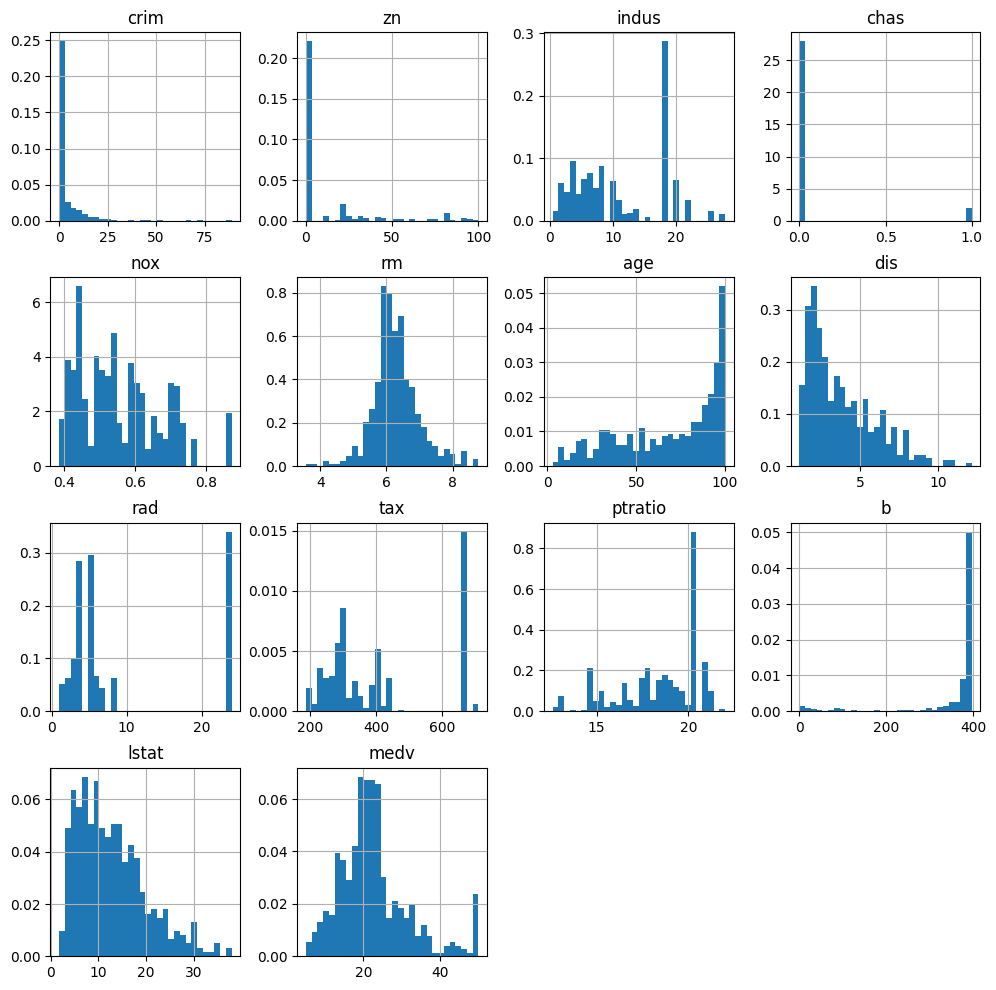

In [ ]:
boston.hist(bins=30, figsize=(12,12), density=True) # 히스토그램, 구간을 지정해서 보여줌
plt.show()

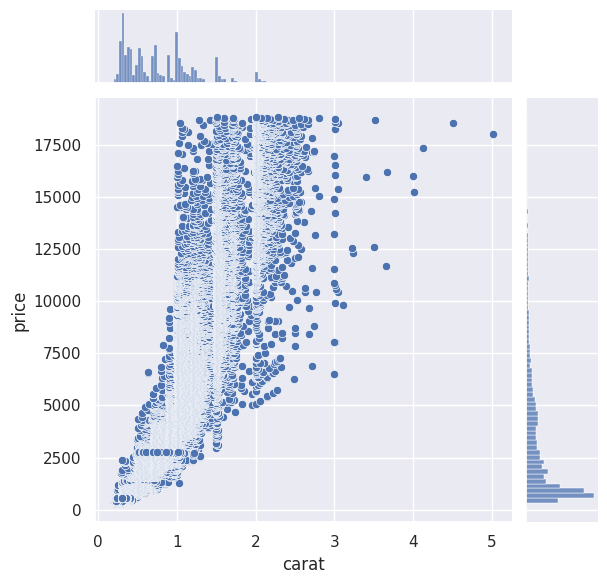

In [ ]:
#diamonds에서 carat과 price에 대한 jointplot

djoin = sns.jointplot(x="carat", y="price", data=diamonds);
djoin

#33. 변수 탐색

Text(0.5, 1.0, 'Boxplot')

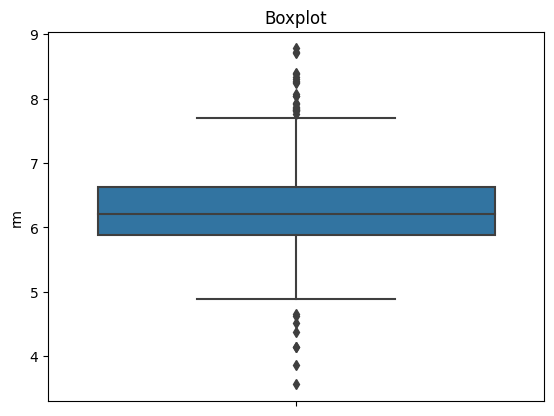

In [ ]:
#Box plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

boston = pd.read_csv("BostonHousing.csv")[['rm', 'lstat', 'crim']]

sns.boxplot(y=boston['rm'])
plt.title('Boxplot')


In [ ]:
#outlier 제거하기
#boxplot의 IQR(Q3-Q1)의 1.5배를 넘는 값들을 제거
def find_boundaries(df, variable, distance):
	IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
	lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
	upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
	return upper_boundary, lower_boundary

upper_boundary, lower_boundary = find_boundaries(boston, 'rm', 1.5)
upper_boundary, lower_boundary

(7.730500000000001, 4.778499999999999)

In [ ]:
a=np.array( [ 2,3,4,5])
print( a > 3 )
np.where( a>3, "A" ,  "B" )
~(a>3)

[False False  True  True]


array([ True,  True, False, False])

In [ ]:
outliers = np.where(boston['rm'] > upper_boundary, True,
                    np.where(boston['rm'] < lower_boundary, True, False)
                    )
~outliers
boston['rm'][~outliers]  #outlier만 출력, T,F로 해당 위치의 값을 선택...

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: rm, Length: 476, dtype: float64

In [ ]:
outliers_df = boston.loc[outliers, 'rm']  #iloc는 정수값...
outliers_df.head()

#outlier 실제로 제거해보기
boston.loc[~outliers, 'rm']

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: rm, Length: 476, dtype: float64

In [ ]:
#crim 변수에서 중앙값보다 크거나, q1보다 작은 값들만 선택하세요
#np.where를 이용하세요
q1 = boston.crim.quantile(0.25)  #Q1
q2 = boston.crim.quantile(0.5)  #Q2, 중앙값
abc = np.where( boston.crim > q2  , True   ,
         np.where( boston.crim < q1, True, False )
         )

boston.crim[abc]
boston.loc[ abc, "crim"]


0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
497    0.26838
501    0.06263
502    0.04527
503    0.06076
505    0.04741
Name: crim, Length: 380, dtype: float64

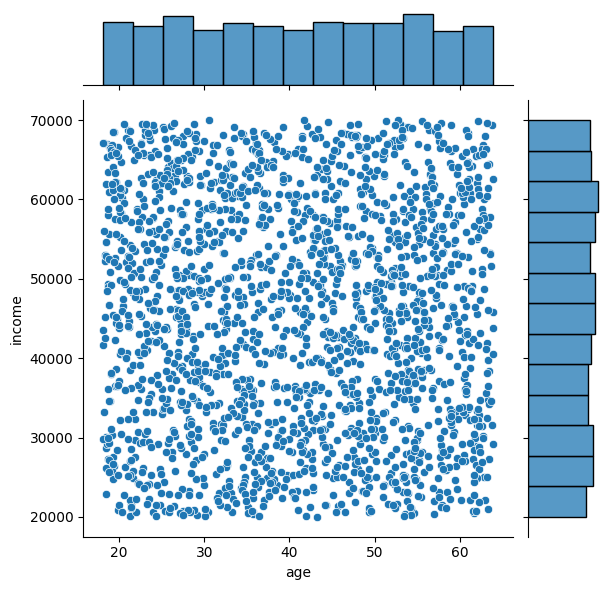

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv("creditset2.csv")
join1 = sns.jointplot(x="age", y="income", data=data);
join1.savefig("join1.png")

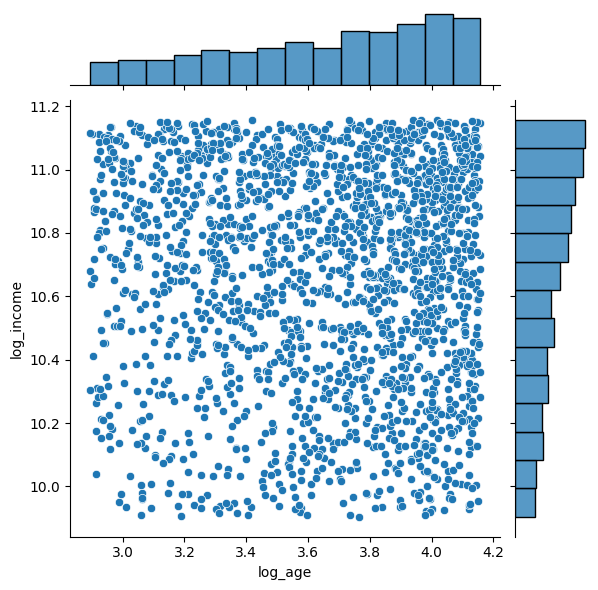

In [ ]:
data["log_age"] = np.log( data.age )
data["log_income"] =np.log( data.income)

join1 = sns.jointplot(x="log_age", y="log_income", data=data);
join1.savefig("join1_log.jpg")

#35. tips데이터 연습

In [ ]:
#tips 예제 데이터로 연습
plt.clf()
tips = sns.load_dataset('tips')
sns.set_style("whitegrid")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 640x480 with 0 Axes>

<Axes: >

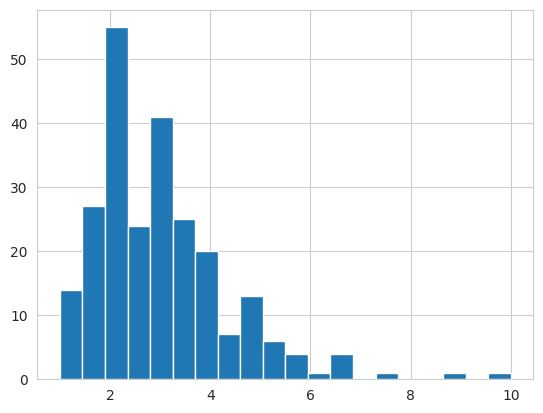

In [ ]:
#tips 자료에서 total_bill, tip 사이의 corr를 구하고, p-value 확인
from scipy import stats
stats.pearsonr( tips.total_bill, tips.tip)
#요일별 빈도 체크
tips.day.value_counts()
#tip에 대한 histogram
tips.tip.hist( bins = 20 )

- tips 데이터에서, time별로 total_bill의 박스플랏
- 각 boxplot은 성별로 나눠서 표현 (hue를 지정)

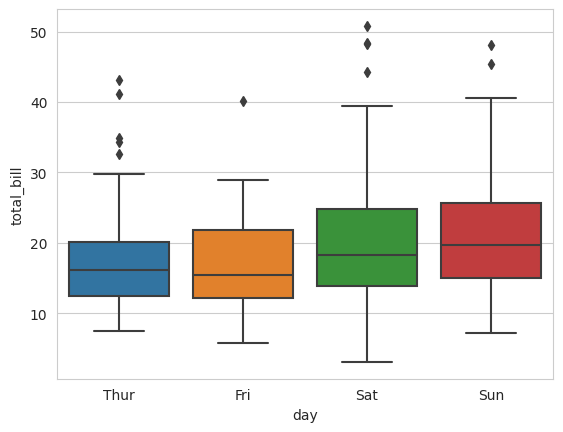

In [ ]:
#box plot
sns.boxplot(x="day", y="total_bill", data=tips)
plt.show()

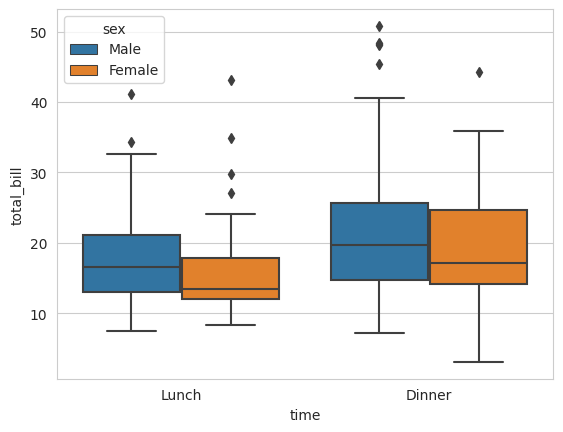

In [ ]:
#box plot
sns.boxplot(x="time", y="total_bill", hue="sex", data=tips)
plt.show()

<Axes: xlabel='clarity', ylabel='price'>

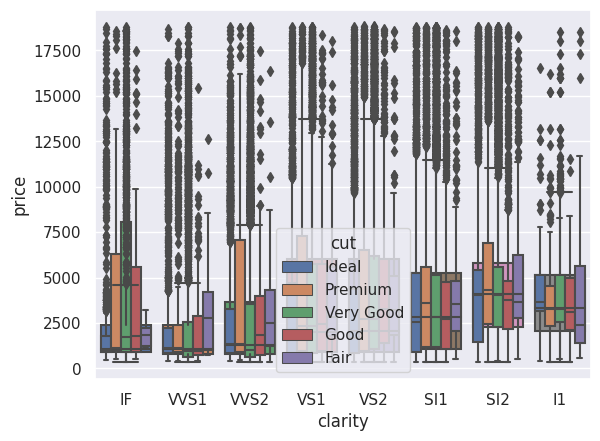

In [ ]:
#diamonds에서 clarity 별로 price box plot
sns.boxplot(x="clarity", y="price", data=diamonds)

# 각 범주별로 cut의 범주를 분리한 box plot
sns.boxplot(x="clarity", y="price", hue="cut", data=diamonds)

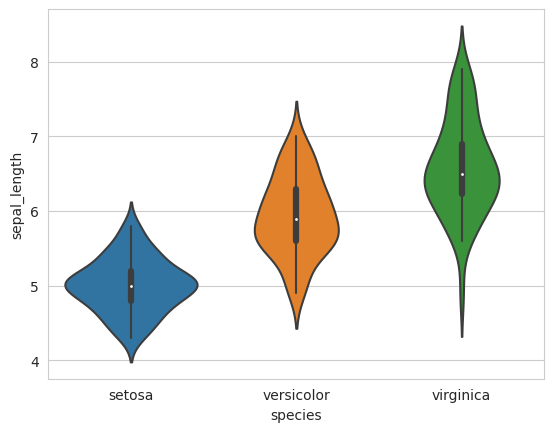

In [ ]:
#violin plot
iris = sns.load_dataset("iris")
sns.violinplot(x=iris.species, y=iris.sepal_length, data=iris);
plt.savefig("violin.png")

In [ ]:
#pivot+Heatmap
#pivot
df1 = pd.DataFrame( {'x':['A','B', 'C', 'D', 'E', 'F'], 'y':[2021,2021,2021,2022,2022,2022], 'z':[1,2,3,4,5,6]})
df1
df1.pivot(index='x',columns='y', values='z').fillna(0) #index 중복 없어야 함.
df1.groupby(['x','y'])['z']
df2 = df1.pivot_table(index='x',columns='y', values='z').fillna(0)
sns.heatmap(df2)

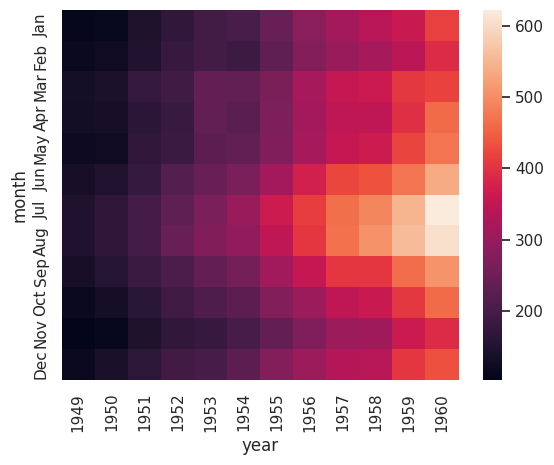

In [ ]:
flights = sns.load_dataset("flights")
flights.head()
fig = sns.heatmap(df)
f2 = fig.get_figure()
f2.savefig("t")

In [ ]:
df = flights.pivot('month', 'year', 'passengers') #행, 열 지정, 값 지정
df.head()

<ipython-input-111-dc9017967813>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df = flights.pivot('month', 'year', 'passengers') #행, 열 지정, 값 지정


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


#36. diabete 데이터 연습

<Axes: >

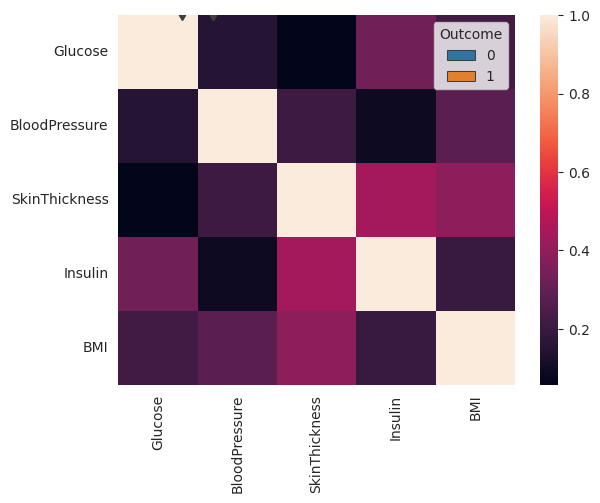

In [ ]:
#diabetes.csv를 읽고, Outcome 값과, Age를 이용해서 BMI에 값을 box plot으로 표현
#Age가 30살 미만, 이상인지로 나누기
dia = pd.read_csv("diabetes.csv")
dia["Age2"] = dia.Age>=30  #np.where( dia.Age >=0, "Old", "Young")
sns.boxplot( x="Age2", y="BMI", hue="Outcome", data=dia)

#Glucose	BloodPressure	SkinThickness	Insulin	BMI	의 corr을 구해보시고, 히트맵으로 표현
sns.heatmap( dia.iloc[:, 1:6].corr() )

<ipython-input-113-7903c2285ca9>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=iris.corr()


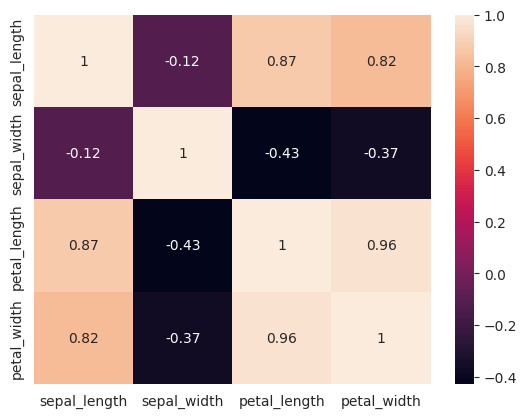

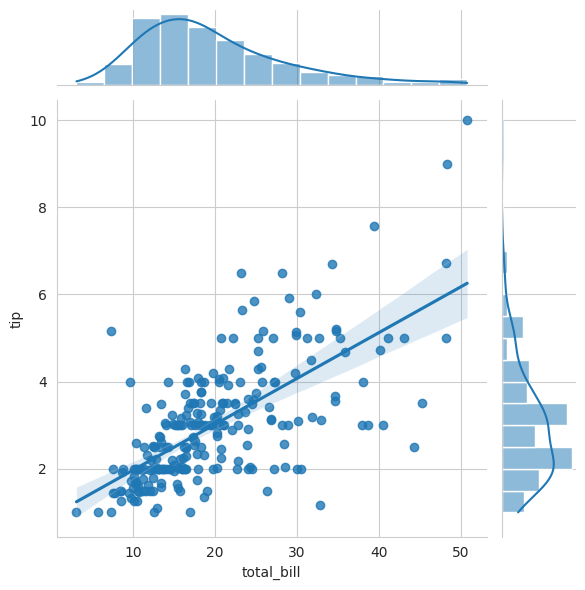

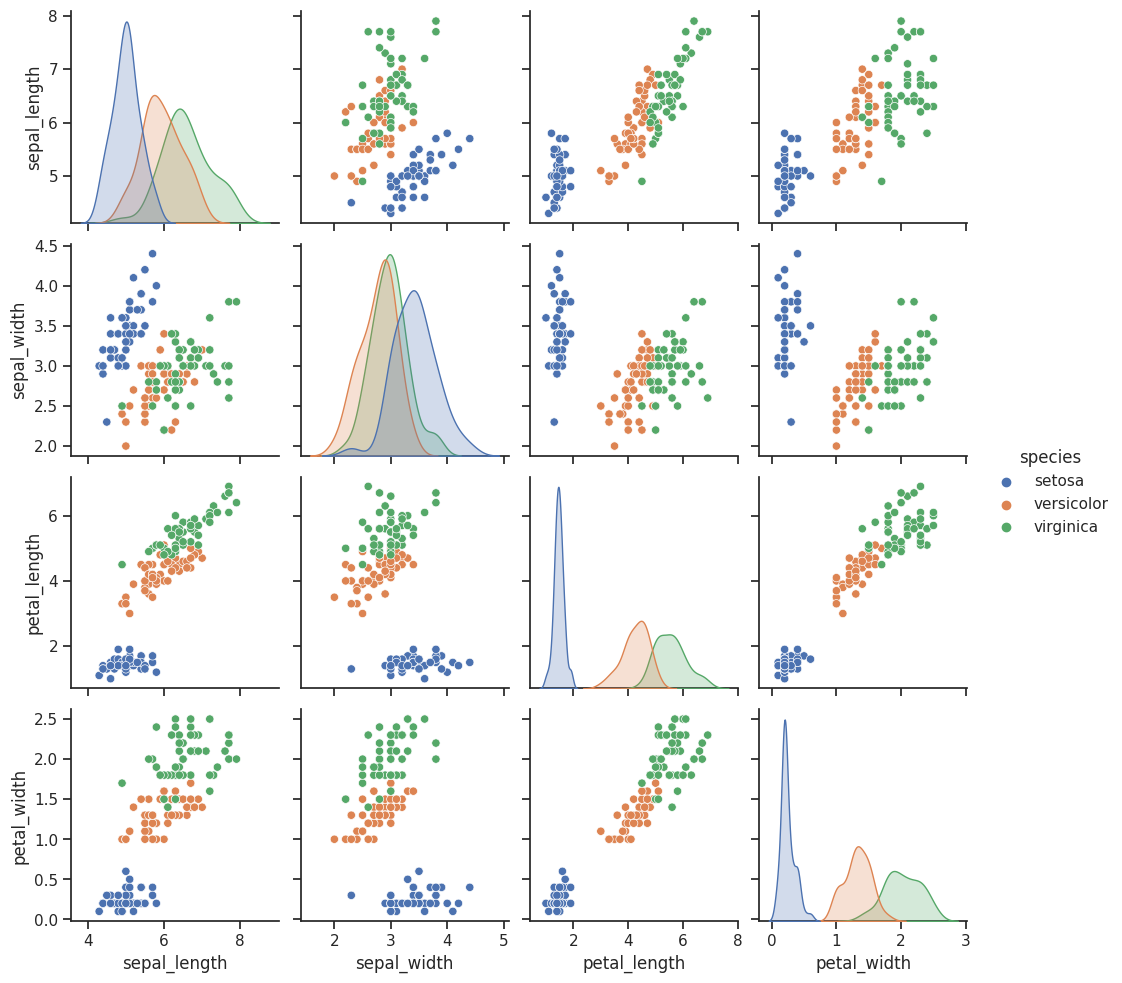

In [ ]:
#heatmap+pandas
df.style.background_gradient(cmap='summer')

#heatmap+corr
corr=iris.corr()
corr
sns.heatmap(corr, annot=True)

#jointplot
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");
plt.savefig('join3.png')

#pair plot
sns.set(style="ticks")
iris = sns.load_dataset("iris")
iris.head(10)

sns.pairplot(iris, hue="species")
plt.show()

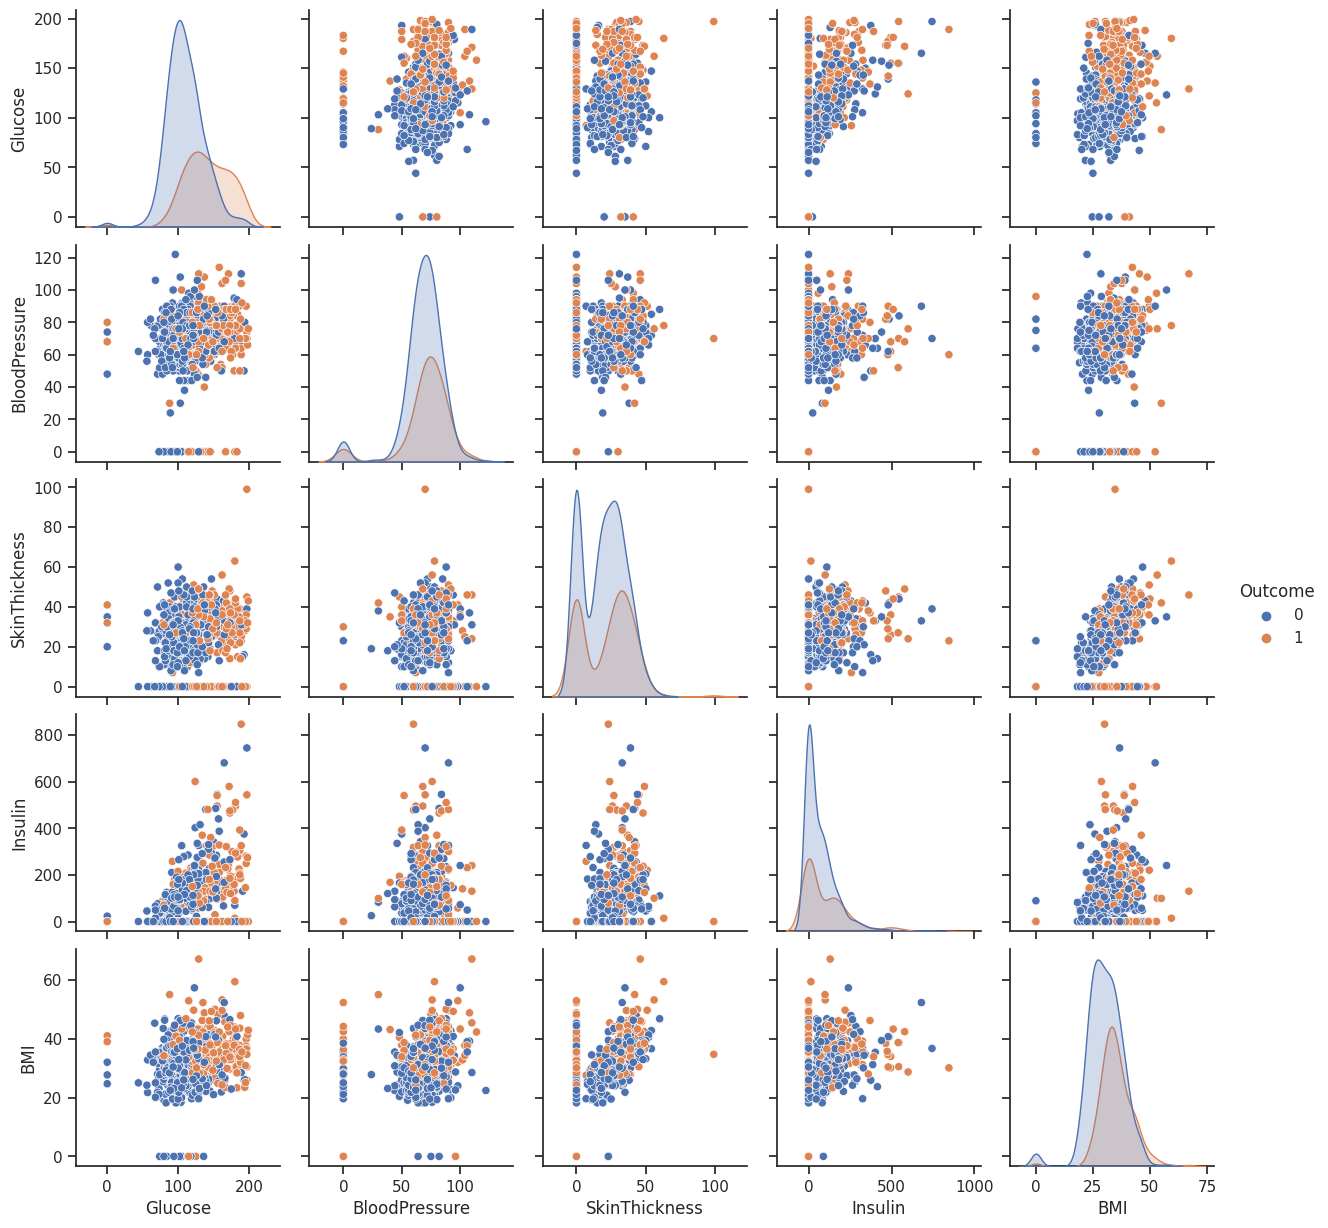

In [ ]:
#diabetes.csv 를 읽어서, Glucose	BloodPressure	SkinThickness	Insulin	BMI 변수들pairplot, 색상은 Outcome
sns.pairplot( dia[ ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Outcome" ]],
             hue="Outcome")

plt.savefig('out1.jpg')
#결과는 out1.jpg로 저장

#37. 선형관계의 시각화

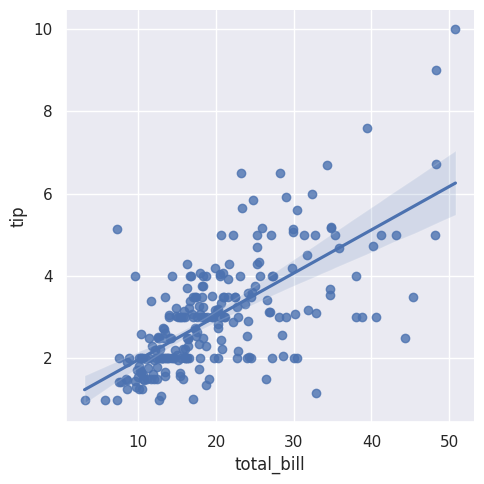

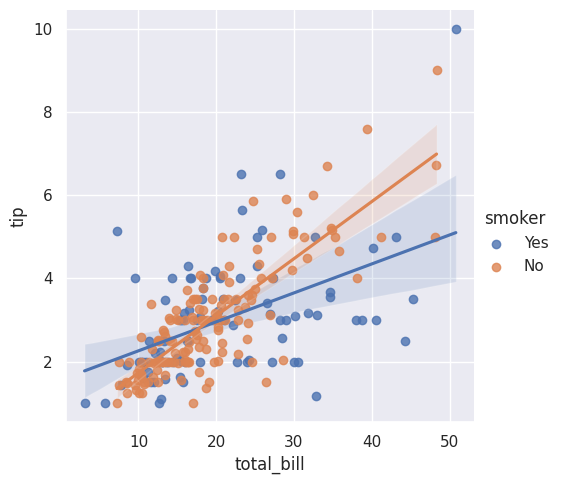

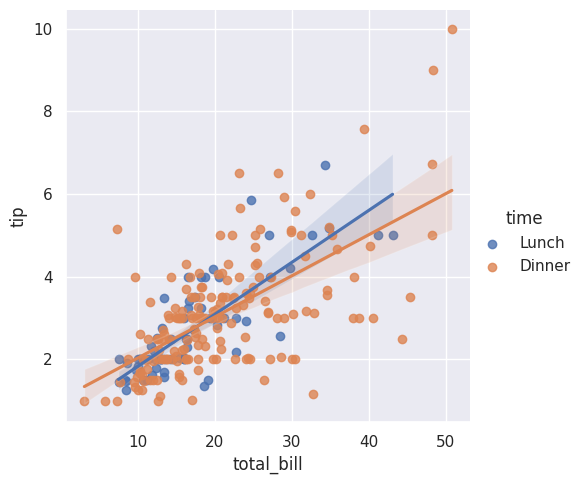

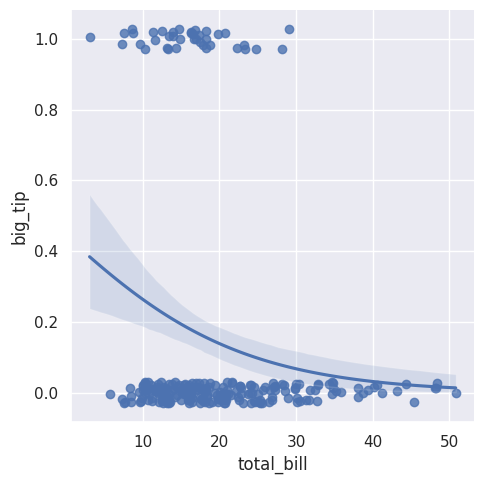

In [ ]:
#lm plot
sns.set_style("darkgrid")
sns.lmplot( x="total_bill", y="tip", data=tips)
plt.show()

#lm plot
sns.set_style("darkgrid")
sns.lmplot( x="total_bill", y="tip", data=tips, hue="smoker")
plt.show()

#lm plot
sns.set_style("darkgrid")
sns.lmplot( x="total_bill", y="tip", data=tips, hue="time")
plt.show()

#logistic regression 결과, binary 표시(20%기준)
tips['big_tip'] = tips['tip']/tips['total_bill'] >= 0.2
sns.lmplot(x="total_bill", y="big_tip", data=tips,logistic=True, y_jitter=.03);
plt.savefig("tiplogit.png")


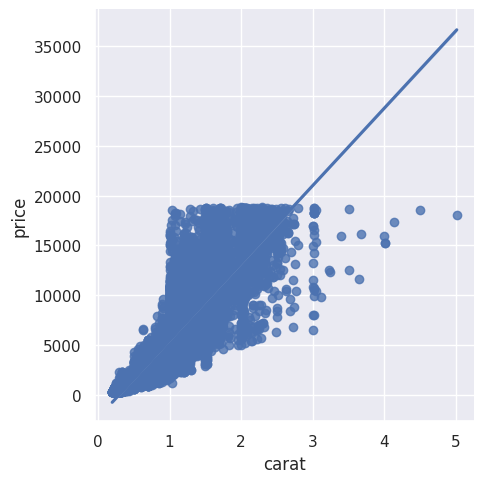

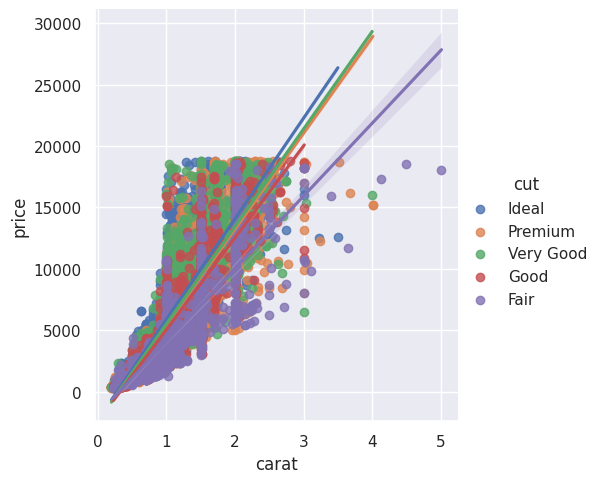

In [ ]:
#diamonds carat, price 에 대해 lmplot
sns.lmplot( x="carat", y="price", data=diamonds)
plt.show()

# 위의 그림 + hue에 cut을 지정
sns.lmplot( x="carat", y="price", data=diamonds, hue="cut")
plt.show()